In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # Read the file passed into this function. 
  # The first line contains the column headers which should be ignored.
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # Read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_labels= []
        temp_images = []

        for row in csv_reader:
        # Makes first iteration of loop for first row do nothing.
        # That's how you skip the first row with headers.
            if first_line: 
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_array = np.array_split(image_data, 28) # Make 28 x 28
                temp_images.append(image_array)
        
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# Add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# the code will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=-1)
testing_images = np.expand_dims(testing_images, axis=-1)

train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Note the input shape is 28 x 28 grayscale.
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax') # 26 alphabets/hand-signs so 26 classes!
])

# Compile Model. 
# loss = 'categorical_crossentropy' doesn't work for some reason.
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
858/857 [==============================] - 82s 96ms/step - loss: 2.8253 - accuracy: 0.1488 - val_loss: 2.0492 - val_accuracy: 0.3455
Epoch 2/15
858/857 [==============================] - 76s 89ms/step - loss: 2.1522 - accuracy: 0.3245 - val_loss: 1.5125 - val_accuracy: 0.5007
Epoch 3/15
858/857 [==============================] - 75s 88ms/step - loss: 1.7240 - accuracy: 0.4506 - val_loss: 1.1171 - val_accuracy: 0.6159
Epoch 4/15
858/857 [==============================] - 76s 88ms/step - loss: 1.4236 - accuracy: 0.5388 - val_loss: 0.7638 - val_accuracy: 0.7280
Epoch 5/15
858/857 [==============================] - 75s 87ms/step - loss: 1.2018 - accuracy: 0.6102 - val_loss: 0.7042 - val_accuracy: 0.7340
Epoch 6/15
858/857 [==============================] - 72s 84ms/step - loss: 1.0613 - accuracy: 0.6544 - val_loss: 0.7969 - val_accuracy: 0.7206
Epoch 7/15
858/857 [==============================] - 74s 86ms/step - loss: 0.9590 - accuracy: 0.6833 - val_loss: 0.5013 - val_accuracy:

[182.5235404904435, 0.67094254]

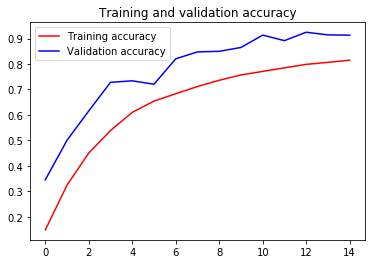

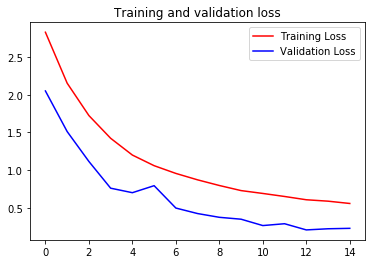

In [6]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Completed

Save

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);